In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

# Подсчет слов разных уровней

In [2]:
data = pd.read_csv('data/base_dataset.csv', sep=',')

In [3]:
from prepoc_func import get_word_features
modified_data = get_word_features(data, 'Essay')

  0%|          | 0/720 [00:00<?, ?it/s]

  0%|          | 0/1239 [00:00<?, ?it/s]

  0%|          | 0/2162 [00:00<?, ?it/s]

  0%|          | 0/3105 [00:00<?, ?it/s]

  0%|          | 0/1823 [00:00<?, ?it/s]

  0%|          | 0/2695 [00:00<?, ?it/s]

  0%|          | 0/570 [00:00<?, ?it/s]

  0%|          | 0/1435 [00:00<?, ?it/s]

  0%|          | 0/1435 [00:00<?, ?it/s]

In [4]:
modified_data.head(3)

,Task_Type,Question,Essay,Examiner_Commen,Task_Response,Coherence_Cohesion,Lexical_Resource,Range_Accuracy,Overall,Unnamed: 9,A1,A2,B1,B2,C1,C2,AC
0,1,The bar chart below describes some changes abo...,"Between 1995 and 2010, a study was conducted r...",NaN,NaN,NaN,NaN,NaN,5.5,NaN,180,262,9,141,4,16,11
1,2,Rich countries often give money to poorer coun...,Poverty represents a worldwide crisis. It is t...,NaN,NaN,NaN,NaN,NaN,6.5,NaN,406,555,37,311,19,27,21
2,1,The bar chart below describes some changes abo...,The left chart shows the population change hap...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,249,324,7,167,9,26,8


In [5]:
modified_data.to_csv('data/base_data_with_words.csv', sep=';')

# Признак похожести вопроса на текст ответа

In [6]:
data = pd.read_csv('data/base_data_with_words.csv', sep=';')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1435 non-null   int64  
 1   Task_Type           1435 non-null   int64  
 2   Question            1435 non-null   object 
 3   Essay               1435 non-null   object 
 4   Examiner_Commen     62 non-null     object 
 5   Task_Response       0 non-null      float64
 6   Coherence_Cohesion  0 non-null      float64
 7   Lexical_Resource    0 non-null      float64
 8   Range_Accuracy      0 non-null      float64
 9   Overall             1435 non-null   float64
 10  Unnamed: 9          0 non-null      float64
 11  A1                  1435 non-null   int64  
 12  A2                  1435 non-null   int64  
 13  B1                  1435 non-null   int64  
 14  B2                  1435 non-null   int64  
 15  C1                  1435 non-null   int64  
 16  C2    

In [8]:
data.head(3)

,Unnamed: 0,Task_Type,Question,Essay,Examiner_Commen,Task_Response,Coherence_Cohesion,Lexical_Resource,Range_Accuracy,Overall,Unnamed: 9,A1,A2,B1,B2,C1,C2,AC
0,0,1,The bar chart below describes some changes abo...,"Between 1995 and 2010, a study was conducted r...",NaN,NaN,NaN,NaN,NaN,5.5,NaN,180,262,9,141,4,16,11
1,1,2,Rich countries often give money to poorer coun...,Poverty represents a worldwide crisis. It is t...,NaN,NaN,NaN,NaN,NaN,6.5,NaN,406,555,37,311,19,27,21
2,2,1,The bar chart below describes some changes abo...,The left chart shows the population change hap...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,249,324,7,167,9,26,8


## Суммарный вектор для вопроса и каждого абзаца эссе

In [9]:
from prepoc_func import lemmatize_column, question_embeddings

Для получения эмбеддингов используем gensim. Предобученная модель word2vec
'GoogleNews-vectors-negative300.bin.gz'

In [10]:
%%time
# lemmatization will be done in function!
summarized_questions = question_embeddings(data, 'Question')

  0%|          | 0/1435 [00:00<?, ?it/s]

  0%|          | 0/1435 [00:00<?, ?it/s]

Word of not found
Word australia not found
Word and not found
Word australia not found
Word and not found
Word and not found
Word summarise not found
Word and not found
Word and not found
Word to not found
Word of not found
Word to not found
Word to not found
Word of not found
Word australia not found
Word and not found
Word australia not found
Word and not found
Word and not found
Word summarise not found
Word and not found
Word and not found
Word to not found
Word of not found
Word to not found
Word to not found
Word of not found
Word to not found
Word a not found
Word european not found
Word and not found
Word and not found
Word and not found
Word specialise not found
Word to not found
Word of not found
Word and not found
Word of not found
Word to not found
Word a not found
Word european not found
Word and not found
Word and not found
Word and not found
Word specialise not found
Word to not found
Word of not found
Word and not found
Word of not found
Word to not found
Word a not fou

In [11]:
summarized_questions

,Question
0,"[-0.001961602105034722, -0.011545817057291666,..."
1,"[0.040359933035714286, 0.02788647242954799, 0...."
2,"[-0.001961602105034722, -0.011545817057291666,..."
3,"[0.040359933035714286, 0.02788647242954799, 0...."
4,"[-0.010390061598557692, -0.011070838341346154,..."
...,...
1430,"[-0.008949973366477272, -0.029632568359375, 0...."
1431,"[0.038909912109375, -0.00604015588760376, 0.02..."
1432,"[0.05069732666015625, 0.03271675109863281, 0.0..."
1433,"[0.05069580078125, -0.006770896911621094, 0.10..."


In [12]:
from prepoc_func import sum_embeddings, similarity_counter

In [13]:
%%time
summarized_essay = sum_embeddings(data, 'Essay')

  0%|          | 0/1435 [00:00<?, ?it/s]

Word and not found
Word a not found
Word of not found
Word australia not found
Word australia not found
Word and not found
Word of not found
Word and not found
Word australia not found
Word australia not found
Word of not found
Word and not found
Word australia not found
Word and not found
Word a not found
Word and not found
Word australia not found
Word and not found
Word a not found
Word a not found
Word to not found
Word to not found
Word and not found
Word a not found
Word of not found
Word and not found
Word and not found
Word a not found
Word to not found
Word monetise not found
Word and not found
Word a not found
Word and not found
Word unprivilge not found
Word and not found
Word and not found
Word to not found
Word of not found
Word a not found
Word and not found
Word a not found
Word to not found
Word of not found
Word a not found
Word and not found
Word to not found
Word and not found
Word of not found
Word of not found
Word to not found
Word and not found
Word of not found


Word of not found
Word of not found
Word of not found
Word and not found
Word to not found
Word of not found
Word vistor not found
Word of not found
Word to not found
Word of not found
Word of not found
Word and not found
Word to not found
Word of not found
Word littile not found
Word and not found
Word suprisingly not found
Word and not found
Word achive not found
Word and not found
Word bulide not found
Word specialise not found
Word to not found
Word and not found
Word specialise not found
Word to not found
Word encahnce not found
Word and not found
Word a not found
Word a not found
Word and not found
Word a not found
Word and not found
Word exmaple not found
Word and not found
Word to not found
Word and not found
Word and not found
Word builide not found
Word specialise not found
Word specificly not found
Word to not found
Word to not found
Word and not found
Word proffessnial not found
Word enviroment not found
Word to not found
Word and not found
Word and not found
Word to not fo

Word to not found
Word and not found
Word to not found
Word a not found
Word taiwan not found
Word and not found
Word a not found
Word to not found
Word and not found
Word and not found
Word to not found
Word a not found
Word a not found
Word to not found
Word and not found
Word a not found
Word to not found
Word and not found
Word of not found
Word and not found
Word of not found
Word to not found
Word and not found
Word of not found
Word and not found
Word and not found
Word a not found
Word to not found
Word and not found
Word a not found
Word of not found
Word and not found
Word to not found
Word a not found
Word to not found
Word and not found
Word a not found
Word of not found
Word a not found
Word to not found
Word and not found
Word and not found
Word a not found
Word of not found
Word and not found
Word to not found
Word impurity not found
Word a not found
Word to not found
Word and not found
Word to not found
Word and not found
Word and not found
Word to not found
Word a not 

Word and not found
Word and not found
Word of not found
Word of not found
Word diiferent not found
Word of not found
Word and not found
Word and not found
Word a not found
Word of not found
Word of not found
Word of not found
Word and not found
Word and not found
Word of not found
Word and not found
Word and not found
Word a not found
Word and not found
Word to not found
Word of not found
Word of not found
Word quater not found
Word of not found
Word of not found
Word and not found
Word and not found
Word and not found
Word a not found
Word of not found
Word a not found
Word of not found
Word and not found
Word a not found
Word of not found
Word of not found
Word of not found
Word a not found
Word quater not found
Word of not found
Word of not found
Word of not found
Word of not found
Word a not found
Word to not found
Word of not found
Word a not found
Word to not found
Word of not found
Word to not found
Word of not found
Word of not found
Word of not found
Word a not found
Word of n

Word suggesttion not found
Word to not found
Word of not found
Word of not found
Word of not found
Word to not found
Word to not found
Word of not found
Word a not found
Word of not found
Word to not found
Word to not found
Word forexample not found
Word a not found
Word to not found
Word and not found
Word and not found
Word to not found
Word satification not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
Word to not found
Word to not found
Word to not found
Word to not found
Word conclution not found
Word to not found
Word satisfiable not found
Word of not found
Word to not found
Word to not found
Word satification not found
Word of not found
Word of not found
Word of not found
Word british not found
Word and not found
Word and not found
Word british not found
Word and not found
Word and not found
Word to not found
Word to not found
Word of not found
Word whold not found
Word and not found
Word of not found
Word and not found
Word to 

Word of not found
Word standart not found
Word of not found
Word of not found
Word and not found
Word to not found
Word to not found
Word of not found
Word and not found
Word to not found
Word a not found
Word of not found
Word to not found
Word a not found
Word medecine not found
Word a not found
Word appeard not found
Word a not found
Word to not found
Word and not found
Word to not found
Word a not found
Word of not found
Word dangeraus not found
Word to not found
Word and not found
Word and not found
Word celcius not found
Word and not found
Word of not found
Word australian not found
Word brisbane not found
Word and not found
Word of not found
Word february not found
Word canberra not found
Word and not found
Word a not found
Word of not found
Word of not found
Word june not found
Word and not found
Word july not found
Word brisbane not found
Word a not found
Word celsius not found
Word february not found
Word canberra not found
Word canberra not found
Word celsius not found
Word 

Word a not found
Word to not found
Word destress not found
Word a not found
Word to not found
Word and not found
Word to not found
Word of not found
Word of not found
Word a not found
Word and not found
Word of not found
Word of not found
Word a not found
Word of not found
Word a not found
Word a not found
Word and not found
Word a not found
Word and not found
Word to not found
Word of not found
Word and not found
Word a not found
Word and not found
Word of not found
Word to not found
Word of not found
Word and not found
Word of not found
Word a not found
Word to not found
Word and not found
Word to not found
Word a not found
Word of not found
Word to not found
Word to not found
Word of not found
Word and not found
Word and not found
Word a not found
Word to not found
Word and not found
Word and not found
Word to not found
Word a not found
Word and not found
Word a not found
Word to not found
Word a not found
Word and not found
Word of not found
Word to not found
Word disorient not fou

Word of not found
Word and not found
Word a not found
Word of not found
Word of not found
Word to not found
Word european not found
Word switzerland not found
Word and not found
Word belgium not found
Word german not found
Word and not found
Word italian not found
Word a not found
Word and not found
Word european not found
Word a not found
Word of not found
Word and not found
Word germany not found
Word netherlands not found
Word and not found
Word european not found
Word to not found
Word of not found
Word and not found
Word europe not found
Word to not found
Word a not found
Word japanese not found
Word of not found
Word japanese not found
Word japanese not found
Word asian not found
Word to not found
Word to not found
Word cambly not found
Word to not found
Word of not found
Word a not found
Word to not found
Word a not found
Word and not found
Word to not found
Word iceland not found
Word a not found
Word icelandish not found
Word and not found
Word iceland not found
Word and not f

Word and not found
Word weaver not found
Word ff not found
Word and not found
Word of not found
Word mexico not found
Word of not found
Word and not found
Word peru not found
Word thailand not found
Word and not found
Word of not found
Word and not found
Word of not found
Word and not found
Word of not found
Word a not found
Word a not found
Word to not found
Word and not found
Word and not found
Word and not found
Word and not found
Word to not found
Word to not found
Word and not found
Word and not found
Word and not found
Word to not found
Word and not found
Word a not found
Word of not found
Word a not found
Word and not found
Word diarehuiya not found
Word colleriahuia not found
Word and not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
Word a not found
Word to not found
Word a not found
Word nruron not found
Word a not found
Word systerm not found
Word a not found
Word dendrite not found
Word sheathe not found
Word a not found
Wo

Word a not found
Word of not found
Word to not found
Word to not found
Word and not found
Word sunray not found
Word to not found
Word to not found
Word and not found
Word to not found
Word to not found
Word and not found
Word of not found
Word to not found
Word a not found
Word of not found
Word to not found
Word of not found
Word to not found
Word of not found
Word a not found
Word of not found
Word to not found
Word of not found
Word to not found
Word a not found
Word to not found
Word of not found
Word of not found
Word a not found
Word a not found
Word of not found
Word and not found
Word to not found
Word familiarise not found
Word a not found
Word to not found
Word a not found
Word of not found
Word contraproductive not found
Word to not found
Word to not found
Word to not found
Word to not found
Word of not found
Word ieltsluminary not found
Word and not found
Word of not found
Word to not found
Word of not found
Word and not found
Word metre not found
Word and not found
Word a

Word to not found
Word and not found
Word of not found
Word of not found
Word to not found
Word a not found
Word to not found
Word a not found
Word a not found
Word to not found
Word and not found
Word a not found
Word to not found
Word becasue not found
Word of not found
Word and not found
Word to not found
Word to not found
Word of not found
Word and not found
Word immision not found
Word to not found
Word a not found
Word to not found
Word to not found
Word a not found
Word a not found
Word a not found
Word and not found
Word to not found
Word a not found
Word a not found
Word outlaying not found
Word and not found
Word a not found
Word to not found
Word a not found
Word a not found
Word to not found
Word to not found
Word a not found
Word metropolitain not found
Word of not found
Word practise not found
Word of not found
Word a not found
Word a not found
Word a not found
Word to not found
Word of not found
Word a not found
Word defrinatly not found
Word a not found
Word of not foun

Word a not found
Word of not found
Word to not found
Word to not found
Word ai not found
Word siri not found
Word alexa not found
Word a not found
Word of not found
Word to not found
Word a not found
Word a not found
Word to not found
Word of not found
Word a not found
Word and not found
Word of not found
Word a not found
Word of not found
Word and not found
Word and not found
Word a not found
Word of not found
Word of not found
Word and not found
Word a not found
Word of not found
Word and not found
Word and not found
Word and not found
Word and not found
Word of not found
Word of not found
Word to not found
Word wc not found
Word of not found
Word of not found
Word and not found
Word a not found
Word of not found
Word a not found
Word to not found
Word of not found
Word to not found
Word of not found
Word a not found
Word of not found
Word a not found
Word and not found
Word to not found
Word to not found
Word a not found
Word and not found
Word to not found
Word of not found
Word a 

Word a not found
Word affetcs not found
Word arround not found
Word and not found
Word catastrofes not found
Word huracane not found
Word and not found
Word occure not found
Word wich not found
Word to not found
Word a not found
Word stopbank not found
Word and not found
Word stopbank not found
Word to not found
Word ais not found
Word and not found
Word mesure not found
Word boulding not found
Word florr not found
Word and not found
Word factore not found
Word to not found
Word boulding not found
Word of not found
Word of not found
Word stopbank not found
Word of not found
Word of not found
Word of not found
Word proffessional not found
Word of not found
Word and not found
Word recibe not found
Word a not found
Word propper not found
Word regarthless not found
Word of not found
Word a not found
Word hughe not found
Word adresse not found
Word a not found
Word propper not found
Word and not found
Word to not found
Word and not found
Word to not found
Word of not found
Word of not found

Word to not found
Word of not found
Word and not found
Word and not found
Word datum not found
Word of not found
Word of not found
Word of not found
Word of not found
Word of not found
Word and not found
Word datum not found
Word of not found
Word of not found
Word of not found
Word and not found
Word and not found
Word datum not found
Word of not found
Word to not found
Word of not found
Word of not found
Word of not found
Word of not found
Word to not found
Word to not found
Word a not found
Word of not found
Word to not found
Word and not found
Word to not found
Word and not found
Word to not found
Word to not found
Word to not found
Word of not found
Word and not found
Word to not found
Word to not found
Word and not found
Word to not found
Word a not found
Word a not found
Word and not found
Word of not found
Word to not found
Word and not found
Word to not found
Word and not found
Word to not found
Word to not found
Word to not found
Word to not found
Word of not found
Word multi

Word of not found
Word of not found
Word to not found
Word and not found
Word of not found
Word of not found
Word to not found
Word to not found
Word and not found
Word of not found
Word of not found
Word of not found
Word france not found
Word and not found
Word of not found
Word of not found
Word france not found
Word and not found
Word france not found
Word of not found
Word and not found
Word of not found
Word of not found
Word to not found
Word france not found
Word and not found
Word to not found
Word summarise not found
Word france not found
Word of not found
Word popultaion not found
Word and not found
Word of not found
Word of not found
Word to not found
Word of not found
Word thta not found
Word france not found
Word of not found
Word to not found
Word usa not found
Word to not found
Word of not found
Word to not found
Word to not found
Word a not found
Word of not found
Word usa not found
Word of not found
Word and not found
Word of not found
Word of not found
Word spanish n

Word of not found
Word to not found
Word a not found
Word of not found
Word and not found
Word of not found
Word and not found
Word averment not found
Word to not found
Word of not found
Word a not found
Word to not found
Word to not found
Word of not found
Word of not found
Word woolen not found
Word a not found
Word of not found
Word and not found
Word woolen not found
Word and not found
Word to not found
Word to not found
Word of not found
Word and not found
Word tuft not found
Word of not found
Word tuft not found
Word a not found
Word tuft not found
Word of not found
Word a not found
Word of not found
Word of not found
Word of not found
Word to not found
Word to not found
Word to not found
Word to not found
Word of not found
Word to not found
Word to not found
Word to not found
Word to not found
Word of not found
Word to not found
Word to not found
Word of not found
Word and not found
Word to not found
Word to not found
Word of not found
Word to not found
Word statius not found
Wo

Word of not found
Word and not found
Word peple not found
Word thoe not found
Word of not found
Word of not found
Word opnion not found
Word and not found
Word of not found
Word of not found
Word a not found
Word ia not found
Word to not found
Word to not found
Word and not found
Word to not found
Word a not found
Word busidness not found
Word and not found
Word to not found
Word a not found
Word of not found
Word to not found
Word of not found
Word a not found
Word to not found
Word uauslly not found
Word a not found
Word to not found
Word of not found
Word to not found
Word to not found
Word a not found
Word a not found
Word to not found
Word and not found
Word a not found
Word of not found
Word to not found
Word and not found
Word to not found
Word becasue not found
Word competite not found
Word of not found
Word and not found
Word and not found
Word and not found
Word and not found
Word and not found
Word a not found
Word to not found
Word and not found
Word and not found
Word and 

Word and not found
Word bilieve not found
Word of not found
Word showen not found
Word and not found
Word to not found
Word of not found
Word to not found
Word and not found
Word theirselve not found
Word of not found
Word of not found
Word and not found
Word analyse not found
Word and not found
Word reimaine not found
Word a not found
Word to not found
Word to not found
Word to not found
Word of not found
Word a not found
Word to not found
Word and not found
Word to not found
Word to not found
Word a not found
Word to not found
Word a not found
Word of not found
Word and not found
Word of not found
Word and not found
Word to not found
Word a not found
Word of not found
Word of not found
Word favour not found
Word of not found
Word mair not found
Word and not found
Word to not found
Word undestand not found
Word to not found
Word and not found
Word to not found
Word a not found
Word of not found
Word and not found
Word behaviour not found
Word a not found
Word to not found
Word of not 

Word to not found
Word a not found
Word favourite not found
Word a not found
Word and not found
Word of not found
Word and not found
Word tranquillizing not found
Word of not found
Word to not found
Word to not found
Word favourite not found
Word a not found
Word a not found
Word a not found
Word of not found
Word to not found
Word of not found
Word to not found
Word to not found
Word of not found
Word a not found
Word of not found
Word a not found
Word and not found
Word a not found
Word ielts not found
Word to not found
Word of not found
Word to not found
Word underexperience not found
Word a not found
Word to not found
Word of not found
Word to not found
Word of not found
Word of not found
Word contigous not found
Word to not found
Word and not found
Word of not found
Word a not found
Word a not found
Word vend not found
Word a not found
Word to not found
Word of not found
Word and not found
Word to not found
Word of not found
Word to not found
Word a not found
Word of not found
Wor

Word to not found
Word a not found
Word to not found
Word of not found
Word hihlight not found
Word a not found
Word of not found
Word quidity not found
Word of not found
Word of not found
Word to not found
Word of not found
Word a not found
Word and not found
Word of not found
Word a not found
Word and not found
Word of not found
Word to not found
Word september not found
Word of not found
Word of not found
Word a not found
Word october not found
Word and not found
Word november not found
Word to not found
Word and not found
Word december not found
Word to not found
Word a not found
Word january not found
Word february not found
Word of not found
Word to not found
Word of not found
Word september not found
Word follwe not found
Word a not found
Word october not found
Word to not found
Word a not found
Word november not found
Word and not found
Word december not found
Word to not found
Word a not found
Word february not found
Word and not found
Word april not found
Word june not found


Word bulit not found
Word fibrous not found
Word and not found
Word and not found
Word to not found
Word to not found
Word of not found
Word metre not found
Word of not found
Word a not found
Word airpumpe not found
Word airpump not found
Word a not found
Word to not found
Word to not found
Word metre not found
Word and not found
Word to not found
Word a not found
Word a not found
Word a not found
Word a not found
Word and not found
Word a not found
Word to not found
Word a not found
Word and not found
Word and not found
Word and not found
Word to not found
Word a not found
Word a not found
Word a not found
Word emphathy not found
Word arguement not found
Word to not found
Word of not found
Word to not found
Word and not found
Word and not found
Word a not found
Word emphathy not found
Word collegue not found
Word a not found
Word unwrapping not found
Word of not found
Word of not found
Word and not found
Word of not found
Word a not found
Word of not found
Word fibrous not found
Word 

Word a not found
Word colour not found
Word and not found
Word flavour not found
Word of not found
Word and not found
Word to not found
Word and not found
Word and not found
Word to not found
Word to not found
Word of not found
Word of not found
Word a not found
Word of not found
Word to not found
Word a not found
Word handphone not found
Word to not found
Word to not found
Word a not found
Word to not found
Word and not found
Word and not found
Word and not found
Word and not found
Word of not found
Word to not found
Word a not found
Word to not found
Word and not found
Word of not found
Word of not found
Word of not found
Word to not found
Word and not found
Word and not found
Word of not found
Word innarticulate not found
Word and not found
Word to not found
Word of not found
Word a not found
Word of not found
Word illust not found
Word a not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
Word of not found
Word a not found
Word to no

Word to not found
Word and not found
Word and not found
Word to not found
Word of not found
Word to not found
Word to not found
Word labour not found
Word of not found
Word of not found
Word to not found
Word to not found
Word and not found
Word to not found
Word of not found
Word to not found
Word of not found
Word to not found
Word a not found
Word of not found
Word to not found
Word of not found
Word and not found
Word of not found
Word to not found
Word of not found
Word to not found
Word to not found
Word a not found
Word and not found
Word to not found
Word fulfil not found
Word iso not found
Word and not found
Word ieee not found
Word to not found
Word to not found
Word of not found
Word of not found
Word to not found
Word to not found
Word and not found
Word to not found
Word of not found
Word a not found
Word to not found
Word to not found
Word to not found
Word of not found
Word of not found
Word of not found
Word and not found
Word a not found
Word to not found
Word a not fo

Word of not found
Word conlusion not found
Word clealy not found
Word to not found
Word datum not found
Word a not found
Word of not found
Word and not found
Word to not found
Word a not found
Word to not found
Word and not found
Word a not found
Word of not found
Word to not found
Word of not found
Word a not found
Word a not found
Word of not found
Word a not found
Word a not found
Word postive not found
Word to not found
Word doesn not found
Word quo not found
Word unnecessay not found
Word and not found
Word to not found
Word and not found
Word variate not found
Word and not found
Word of not found
Word and not found
Word a not found
Word underprevilaged not found
Word to not found
Word to not found
Word of not found
Word and not found
Word of not found
Word and not found
Word of not found
Word to not found
Word existance not found
Word resepcetively not found
Word and not found
Word of not found
Word a not found
Word of not found
Word of not found
Word to not found
Word and not fo

Word italy not found
Word a not found
Word ampliude not found
Word of not found
Word and not found
Word italy not found
Word and not found
Word of not found
Word begining not found
Word argentina not found
Word italy not found
Word and not found
Word korea not found
Word a not found
Word to not found
Word korea not found
Word and not found
Word argentina not found
Word to not found
Word italy not found
Word to not found
Word indonesia not found
Word to not found
Word of not found
Word and not found
Word of not found
Word to not found
Word argentina not found
Word of not found
Word korea not found
Word of not found
Word indonesia not found
Word to not found
Word italy not found
Word to not found
Word to not found
Word majorly not found
Word futur not found
Word and not found
Word unfortunatly not found
Word thit not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
Word to not found
Word of not found
Word and not found
Word of not found
Wor

Word to not found
Word organisation not found
Word and not found
Word to not found
Word and not found
Word intercultural not found
Word of not found
Word of not found
Word and not found
Word australian not found
Word of not found
Word and not found
Word of not found
Word of not found
Word to not found
Word of not found
Word a not found
Word to not found
Word possively not found
Word of not found
Word enrolment not found
Word and not found
Word of not found
Word enrolment not found
Word of not found
Word to not found
Word of not found
Word of not found
Word enrolment not found
Word of not found
Word and not found
Word and not found
Word neverthless not found
Word of not found
Word of not found
Word hoster not found
Word a not found
Word a not found
Word logisitcs not found
Word to not found
Word of not found
Word and not found
Word to not found
Word of not found
Word disadvantageous not found
Word of not found
Word a not found
Word and not found
Word a not found
Word organisation not fo

Word and not found
Word to not found
Word and not found
Word and not found
Word to not found
Word a not found
Word of not found
Word to not found
Word to not found
Word of not found
Word a not found
Word of not found
Word of not found
Word of not found
Word to not found
Word a not found
Word of not found
Word of not found
Word nutrtient not found
Word and not found
Word and not found
Word physic not found
Word and not found
Word of not found
Word a not found
Word a not found
Word of not found
Word to not found
Word a not found
Word heathi not found
Word to not found
Word to not found
Word a not found
Word to not found
Word a not found
Word to not found
Word and not found
Word of not found
Word a not found
Word carbonated not found
Word to not found
Word to not found
Word of not found
Word of not found
Word a not found
Word and not found
Word a not found
Word softener not found
Word and not found
Word to not found
Word to not found
Word and not found
Word a not found
Word to not found
W

Word a not found
Word and not found
Word and not found
Word to not found
Word to not found
Word and not found
Word to not found
Word of not found
Word a not found
Word to not found
Word of not found
Word a not found
Word to not found
Word habbit not found
Word and not found
Word to not found
Word to not found
Word to not found
Word and not found
Word japan not found
Word and not found
Word australia not found
Word of not found
Word to not found
Word australia not found
Word to not found
Word of not found
Word and not found
Word to not found
Word of not found
Word japan not found
Word and not found
Word and not found
Word and not found
Word and not found
Word of not found
Word japan not found
Word of not found
Word a not found
Word and not found
Word australia not found
Word and not found
Word to not found
Word transporation not found
Word a not found
Word to not found
Word of not found
Word and not found
Word of not found
Word australia not found
Word of not found
Word of not found
Wor

Word of not found
Word and not found
Word of not found
Word to not found
Word to not found
Word to not found
Word to not found
Word and not found
Word to not found
Word and not found
Word of not found
Word mathematic not found
Word and not found
Word to not found
Word and not found
Word focusly not found
Word and not found
Word a not found
Word to not found
Word and not found
Word olympic not found
Word usa not found
Word sovet not found
Word obteine not found
Word of not found
Word and not found
Word france not found
Word of not found
Word a not found
Word of not found
Word olympic not found
Word of not found
Word olympic not found
Word usa not found
Word sovet not found
Word a not found
Word similiar not found
Word of not found
Word olympic not found
Word usa not found
Word sovietic not found
Word and not found
Word france not found
Word of not found
Word usa not found
Word vittory not found
Word a not found
Word of not found
Word japan not found
Word and not found
Word germany not f

Word nymph not found
Word molt not found
Word to not found
Word of not found
Word and not found
Word of not found
Word and not found
Word to not found
Word of not found
Word wether not found
Word a not found
Word of not found
Word to not found
Word to not found
Word of not found
Word a not found
Word to not found
Word to not found
Word a not found
Word of not found
Word and not found
Word developement not found
Word to not found
Word of not found
Word to not found
Word and not found
Word a not found
Word and not found
Word to not found
Word evryone not found
Word to not found
Word developement not found
Word of not found
Word opportunie not found
Word to not found
Word and not found
Word to not found
Word and not found
Word of not found
Word a not found
Word centre not found
Word of not found
Word and not found
Word of not found
Word a not found
Word of not found
Word a not found
Word multistep not found
Word and not found
Word of not found
Word a not found
Word of not found
Word and n

Word and not found
Word and not found
Word jean not found
Word austin not found
Word and not found
Word charles not found
Word dicken not found
Word shakespear not found
Word of not found
Word dicken not found
Word and not found
Word to not found
Word instace not found
Word and not found
Word a not found
Word of not found
Word to not found
Word and not found
Word and not found
Word to not found
Word a not found
Word statium not found
Word and not found
Word of not found
Word of not found
Word to not found
Word of not found
Word austin not found
Word of not found
Word shakespear not found
Word and not found
Word and not found
Word and not found
Word romeo not found
Word and not found
Word juliet not found
Word to not found
Word a not found
Word to not found
Word of not found
Word bankcrupt not found
Word a not found
Word of not found
Word to not found
Word to not found
Word to not found
Word to not found
Word and not found
Word and not found
Word to not found
Word of not found
Word to n

Word to not found
Word to not found
Word to not found
Word summarise not found
Word to not found
Word of not found
Word of not found
Word veiw not found
Word to not found
Word reseachs not found
Word of not found
Word of not found
Word and not found
Word of not found
Word a not found
Word korea not found
Word of not found
Word ireland not found
Word japan not found
Word poland not found
Word portugal not found
Word and not found
Word to not found
Word of not found
Word and not found
Word millon not found
Word of not found
Word of not found
Word japan not found
Word and not found
Word of not found
Word and not found
Word korea not found
Word of not found
Word of not found
Word japan not found
Word poland not found
Word and not found
Word portugal not found
Word of not found
Word to not found
Word ireland not found
Word of not found
Word and not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
Word of not found
Word and not found
Word of no

Word of not found
Word attind not found
Word to not found
Word to not found
Word to not found
Word to not found
Word critivty not found
Word and not found
Word dicison not found
Word and not found
Word etheir not found
Word to not found
Word to not found
Word worldwise not found
Word of not found
Word samsung not found
Word nokia not found
Word lg not found
Word and not found
Word zte not found
Word and not found
Word nokia not found
Word and not found
Word lg not found
Word samsung not found
Word and not found
Word zte not found
Word of not found
Word to not found
Word zte not found
Word nokia not found
Word dammatically not found
Word to not found
Word lg not found
Word steadly not found
Word to not found
Word nokia not found
Word and not found
Word chinese not found
Word of not found
Word a not found
Word avoinde not found
Word to not found
Word of not found
Word of not found
Word of not found
Word and not found
Word and not found
Word to not found
Word of not found
Word and not fou

Word a not found
Word to not found
Word a not found
Word and not found
Word to not found
Word to not found
Word to not found
Word and not found
Word of not found
Word lang not found
Word lang not found
Word a not found
Word chinese not found
Word talente not found
Word of not found
Word and not found
Word of not found
Word chinese not found
Word of not found
Word and not found
Word and not found
Word to not found
Word to not found
Word to not found
Word to not found
Word to not found
Word a not found
Word to not found
Word to not found
Word and not found
Word to not found
Word a not found
Word to not found
Word a not found
Word of not found
Word napoleon not found
Word bonaparte not found
Word and not found
Word winston not found
Word churchill not found
Word to not found
Word and not found
Word to not found
Word to not found
Word to not found
Word to not found
Word of not found
Word and not found
Word of not found
Word of not found
Word and not found
Word of not found
Word of not foun

Word of not found
Word a not found
Word of not found
Word to not found
Word and not found
Word a not found
Word nautre not found
Word to not found
Word a not found
Word a not found
Word nationaltie not found
Word and not found
Word to not found
Word a not found
Word to not found
Word and not found
Word a not found
Word to not found
Word to not found
Word and not found
Word of not found
Word attender not found
Word of not found
Word eductional not found
Word of not found
Word and not found
Word and not found
Word and not found
Word to not found
Word of not found
Word of not found
Word of not found
Word attender not found
Word and not found
Word of not found
Word to not found
Word and not found
Word of not found
Word attender not found
Word and not found
Word a not found
Word of not found
Word a not found
Word of not found
Word a not found
Word individula not found
Word to not found
Word of not found
Word a not found
Word parie not found
Word suppore not found
Word and not found
Word to 

Word a not found
Word of not found
Word of not found
Word of not found
Word france not found
Word of not found
Word to not found
Word to not found
Word of not found
Word france not found
Word to not found
Word of not found
Word to not found
Word a not found
Word of not found
Word to not found
Word a not found
Word labour not found
Word of not found
Word to not found
Word to not found
Word eassy not found
Word to not found
Word and not found
Word to not found
Word a not found
Word to not found
Word to not found
Word knowledege not found
Word of not found
Word and not found
Word of not found
Word to not found
Word and not found
Word a not found
Word to not found
Word a not found
Word of not found
Word to not found
Word a not found
Word to not found
Word undesired not found
Word to not found
Word younster not found
Word and not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
Word to not found
Word to not found
Word of not found
Word france 

Word undoubtly not found
Word of not found
Word injurye not found
Word and not found
Word and not found
Word partipate not found
Word a not found
Word of not found
Word olympic not found
Word stonger not found
Word and not found
Word a not found
Word and not found
Word a not found
Word and not found
Word enviornment not found
Word to not found
Word of not found
Word to not found
Word a not found
Word of not found
Word benifit not found
Word and not found
Word to not found
Word to not found
Word of not found
Word and not found
Word and not found
Word a not found
Word to not found
Word to not found
Word and not found
Word to not found
Word and not found
Word a not found
Word to not found
Word and not found
Word and not found
Word to not found
Word of not found
Word of not found
Word of not found
Word and not found
Word inadaptable not found
Word and not found
Word a not found
Word to not found
Word and not found
Word and not found
Word to not found
Word and not found
Word to not found
Wo

Word to not found
Word to not found
Word to not found
Word a not found
Word to not found
Word a not found
Word of not found
Word to not found
Word and not found
Word and not found
Word to not found
Word to not found
Word a not found
Word a not found
Word of not found
Word to not found
Word a not found
Word of not found
Word favour not found
Word of not found
Word to not found
Word a not found
Word to not found
Word a not found
Word to not found
Word to not found
Word and not found
Word to not found
Word of not found
Word of not found
Word aforementione not found
Word of not found
Word a not found
Word to not found
Word a not found
Word of not found
Word to not found
Word to not found
Word to not found
Word to not found
Word to not found
Word to not found
Word and not found
Word and not found
Word to not found
Word of not found
Word of not found
Word and not found
Word to not found
Word to not found
Word of not found
Word and not found
Word of not found
Word of not found
Word to not fou

Word to not found
Word convect not found
Word a not found
Word to not found
Word of not found
Word a not found
Word to not found
Word a not found
Word of not found
Word and not found
Word and not found
Word a not found
Word of not found
Word to not found
Word of not found
Word a not found
Word of not found
Word dweller not found
Word a not found
Word to not found
Word to not found
Word celullar not found
Word to not found
Word to not found
Word a not found
Word to not found
Word and not found
Word of not found
Word to not found
Word of not found
Word of not found
Word psychologic not found
Word a not found
Word of not found
Word to not found
Word a not found
Word of not found
Word to not found
Word and not found
Word and not found
Word of not found
Word of not found
Word to not found
Word of not found
Word and not found
Word to not found
Word a not found
Word and not found
Word of not found
Word to not found
Word recolecte not found
Word and not found
Word millie not found
Word and not

Word to not found
Word to not found
Word to not found
Word and not found
Word atheletic not found
Word of not found
Word of not found
Word to not found
Word of not found
Word and not found
Word of not found
Word to not found
Word exercie not found
Word and not found
Word and not found
Word and not found
Word a not found
Word and not found
Word a not found
Word competitior not found
Word praph not found
Word of not found
Word and not found
Word and not found
Word and not found
Word of not found
Word of not found
Word of not found
Word usa not found
Word and not found
Word japan not found
Word and not found
Word repectively not found
Word to not found
Word to not found
Word usa not found
Word and not found
Word to not found
Word and not found
Word japan not found
Word to not found
Word populartion not found
Word to not found
Word to not found
Word usa not found
Word of not found
Word japan not found
Word to not found
Word of not found
Word and not found
Word of not found
Word to not foun

Word flavour not found
Word of not found
Word and not found
Word of not found
Word and not found
Word a not found
Word of not found
Word of not found
Word of not found
Word to not found
Word to not found
Word of not found
Word to not found
Word of not found
Word to not found
Word to not found
Word needful not found
Word dirink not found
Word demage not found
Word to not found
Word to not found
Word and not found
Word australia not found
Word to not found
Word diffrent not found
Word diffrent not found
Word cultureie not found
Word and not found
Word of not found
Word diffrent not found
Word of not found
Word of not found
Word australia not found
Word netherlands not found
Word to not found
Word australia not found
Word netherlands not found
Word of not found
Word zealand not found
Word citiys not found
Word australia not found
Word australia not found
Word countyie not found
Word a not found
Word culther not found
Word socity not found
Word and not found
Word diffrent not found
Word an

Word of not found
Word and not found
Word and not found
Word of not found
Word and not found
Word a not found
Word to not found
Word and not found
Word of not found
Word of not found
Word to not found
Word a not found
Word to not found
Word to not found
Word to not found
Word a not found
Word of not found
Word a not found
Word of not found
Word a not found
Word and not found
Word of not found
Word and not found
Word and not found
Word of not found
Word a not found
Word to not found
Word of not found
Word and not found
Word a not found
Word and not found
Word to not found
Word a not found
Word to not found
Word a not found
Word to not found
Word of not found
Word of not found
Word a not found
Word to not found
Word to not found
Word japan not found
Word a not found
Word to not found
Word a not found
Word of not found
Word to not found
Word and not found
Word of not found
Word eventhough not found
Word to not found
Word of not found
Word to not found
Word to not found
Word and not found


Word to not found
Word of not found
Word to not found
Word europe not found
Word and not found
Word asia not found
Word pacefic not found
Word to not found
Word and not found
Word europe not found
Word and not found
Word asia not found
Word pacefic not found
Word of not found
Word a not found
Word of not found
Word to not found
Word a not found
Word and not found
Word of not found
Word europe not found
Word and not found
Word of not found
Word of not found
Word of not found
Word europe not found
Word latin not found
Word and not found
Word caribean not found
Word of not found
Word and not found
Word of not found
Word and not found
Word of not found
Word tokyo not found
Word osaka not found
Word and not found
Word yokohama not found
Word japan not found
Word to not found
Word and not found
Word of not found
Word and not found
Word to not found
Word japan not found
Word to not found
Word to not found
Word a not found
Word and not found
Word and not found
Word to not found
Word and not fo

Word to not found
Word to not found
Word of not found
Word a not found
Word to not found
Word coporate not found
Word to not found
Word to not found
Word a not found
Word to not found
Word to not found
Word to not found
Word fuifill not found
Word a not found
Word and not found
Word to not found
Word inversely not found
Word of not found
Word to not found
Word of not found
Word and not found
Word and not found
Word of not found
Word a not found
Word of not found
Word of not found
Word to not found
Word and not found
Word and not found
Word to not found
Word to not found
Word a not found
Word to not found
Word of not found
Word a not found
Word to not found
Word of not found
Word of not found
Word of not found
Word and not found
Word to not found
Word of not found
Word to not found
Word and not found
Word and not found
Word to not found
Word to not found
Word to not found
Word of not found
Word a not found
Word of not found
Word of not found
Word to not found
Word a not found
Word to no

Word of not found
Word rinishe not found
Word and not found
Word to not found
Word paster not found
Word to not found
Word a not found
Word a not found
Word pressurer not found
Word a not found
Word of not found
Word and not found
Word to not found
Word and not found
Word a not found
Word a not found
Word of not found
Word and not found
Word and not found
Word to not found
Word of not found
Word thorougly not found
Word to not found
Word of not found
Word of not found
Word and not found
Word to not found
Word of not found
Word of not found
Word to not found
Word a not found
Word of not found
Word and not found
Word instagram not found
Word of not found
Word of not found
Word of not found
Word and not found
Word to not found
Word and not found
Word to not found
Word a not found
Word and not found
Word to not found
Word of not found
Word to not found
Word and not found
Word to not found
Word and not found
Word a not found
Word to not found
Word to not found
Word of not found
Word and not

Word to not found
Word and not found
Word and not found
Word a not found
Word of not found
Word to not found
Word and not found
Word of not found
Word and not found
Word to not found
Word and not found
Word of not found
Word of not found
Word to not found
Word of not found
Word to not found
Word to not found
Word to not found
Word a not found
Word to not found
Word and not found
Word to not found
Word to not found
Word to not found
Word and not found
Word a not found
Word of not found
Word of not found
Word of not found
Word a not found
Word of not found
Word of not found
Word and not found
Word to not found
Word to not found
Word to not found
Word a not found
Word of not found
Word to not found
Word and not found
Word to not found
Word a not found
Word to not found
Word to not found
Word to not found
Word to not found
Word to not found
Word to not found
Word of not found
Word to not found
Word to not found
Word tigh not found
Word demostrate not found
Word of not found
Word of not fou

Word to not found
Word to not found
Word of not found
Word and not found
Word to not found
Word a not found
Word entery not found
Word to not found
Word submmit not found
Word and not found
Word to not found
Word to not found
Word and not found
Word enrolment not found
Word to not found
Word entery not found
Word of not found
Word and not found
Word to not found
Word to not found
Word experince not found
Word to not found
Word circumictance not found
Word factore not found
Word and not found
Word influnce not found
Word and not found
Word personlity not found
Word to not found
Word experincee not found
Word a not found
Word and not found
Word experince not found
Word a not found
Word a not found
Word a not found
Word and not found
Word demenssion not found
Word diffierent not found
Word to not found
Word and not found
Word to not found
Word a not found
Word and not found
Word of not found
Word a not found
Word itslef not found
Word a not found
Word a not found
Word and not found
Word n

Word a not found
Word japan not found
Word to not found
Word to not found
Word and not found
Word to not found
Word and not found
Word and not found
Word a not found
Word to not found
Word of not found
Word to not found
Word a not found
Word to not found
Word to not found
Word and not found
Word and not found
Word to not found
Word of not found
Word of not found
Word to not found
Word to not found
Word a not found
Word and not found
Word to not found
Word to not found
Word a not found
Word and not found
Word to not found
Word and not found
Word to not found
Word a not found
Word to not found
Word a not found
Word and not found
Word to not found
Word of not found
Word of not found
Word documental not found
Word of not found
Word of not found
Word specie not found
Word and not found
Word of not found
Word and not found
Word a not found
Word 動物 not found
Word of not found
Word of not found
Word and not found
Word a not found
Word and not found
Word a not found
Word of not found
Word of no

Word dioxie not found
Word colouring not found
Word and not found
Word flavour not found
Word and not found
Word to not found
Word and not found
Word to not found
Word of not found
Word of not found
Word and not found
Word to not found
Word to not found
Word a not found
Word to not found
Word and not found
Word and not found
Word a not found
Word to not found
Word of not found
Word and not found
Word a not found
Word a not found
Word a not found
Word a not found
Word and not found
Word to not found
Word to not found
Word a not found
Word to not found
Word to not found
Word to not found
Word and not found
Word to not found
Word overstimulate not found
Word to not found
Word a not found
Word and not found
Word to not found
Word to not found
Word of not found
Word and not found
Word to not found
Word of not found
Word a not found
Word to not found
Word and not found
Word to not found
Word to not found
Word carbonated not found
Word to not found
Word of not found
Word to not found
Word to 

Word and not found
Word of not found
Word a not found
Word and not found
Word of not found
Word a not found
Word of not found
Word of not found
Word a not found
Word of not found
Word to not found
Word unconsidered not found
Word and not found
Word and not found
Word a not found
Word and not found
Word a not found
Word a not found
Word to not found
Word to not found
Word a not found
Word a not found
Word and not found
Word extraordinarly not found
Word to not found
Word and not found
Word a not found
Word benifit not found
Word to not found
Word to not found
Word a not found
Word poeple not found
Word a not found
Word of not found
Word a not found
Word a not found
Word to not found
Word to not found
Word a not found
Word of not found
Word a not found
Word to not found
Word to not found
Word of not found
Word and not found
Word and not found
Word to not found
Word of not found
Word a not found
Word a not found
Word to not found
Word to not found
Word of not found
Word benifit not found


Word a not found
Word prominet not found
Word melbourne not found
Word and not found
Word of not found
Word and not found
Word of not found
Word to not found
Word a not found
Word breathtake not found
Word to not found
Word climibe not found
Word a not found
Word and not found
Word ounline not found
Word and not found
Word of not found
Word globalisation not found
Word to not found
Word of not found
Word of not found
Word and not found
Word to not found
Word to not found
Word to not found
Word of not found
Word and not found
Word and not found
Word faunas not found
Word of not found
Word to not found
Word of not found
Word and not found
Word to not found
Word a not found
Word to not found
Word everest not found
Word of not found
Word outdate not found
Word and not found
Word to not found
Word to not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
Word a not found
Word poeple not found
Word to not found
Word to not found
Word to not found

Word and not found
Word to not found
Word of not found
Word a not found
Word psycological not found
Word and not found
Word upcomme not found
Word and not found
Word psycological not found
Word to not found
Word of not found
Word and not found
Word of not found
Word a not found
Word a not found
Word a not found
Word a not found
Word of not found
Word to not found
Word to not found
Word of not found
Word a not found
Word and not found
Word accessable not found
Word nowday not found
Word a not found
Word of not found
Word a not found
Word nowday not found
Word to not found
Word psycological not found
Word and not found
Word to not found
Word mba not found
Word and not found
Word mba not found
Word mba not found
Word of not found
Word to not found
Word of not found
Word of not found
Word mba not found
Word to not found
Word of not found
Word mba not found
Word of not found
Word and not found
Word of not found
Word mba not found
Word of not found
Word of not found
Word and not found
Word a

Word of not found
Word bart not found
Word and not found
Word of not found
Word of not found
Word of not found
Word australia not found
Word and not found
Word asia not found
Word incremente not found
Word to not found
Word australia not found
Word asia not found
Word additionaly not found
Word of not found
Word australia not found
Word australia not found
Word of not found
Word of not found
Word of not found
Word asia not found
Word of not found
Word a not found
Word of not found
Word australia not found
Word of not found
Word to not found
Word of not found
Word of not found
Word of not found
Word and not found
Word to not found
Word to not found
Word of not found
Word asia not found
Word cleanlinesswere not found
Word a not found
Word botton not found
Word of not found
Word to not found
Word a not found
Word a not found
Word of not found
Word of not found
Word especifically not found
Word of not found
Word to not found
Word and not found
Word of not found
Word to not found
Word coutr

Word to not found
Word to not found
Word a not found
Word a not found
Word of not found
Word and not found
Word to not found
Word and not found
Word of not found
Word and not found
Word ernest not found
Word hemingway not found
Word a not found
Word of not found
Word to not found
Word and not found
Word a not found
Word a not found
Word to not found
Word a not found
Word to not found
Word of not found
Word choise not found
Word to not found
Word and not found
Word to not found
Word a not found
Word and not found
Word and not found
Word a not found
Word competetion not found
Word a not found
Word of not found
Word to not found
Word to not found
Word appropriete not found
Word and not found
Word and not found
Word undisputably not found
Word of not found
Word ic not found
Word and not found
Word and not found
Word of not found
Word of not found
Word of not found
Word and not found
Word a not found
Word a not found
Word and not found
Word to not found
Word of not found
Word to not found
W

Word and not found
Word australia not found
Word switzerland not found
Word iceland not found
Word zeland not found
Word and not found
Word usa not found
Word and not found
Word of not found
Word and not found
Word of not found
Word busyness not found
Word iceland not found
Word iceland not found
Word of not found
Word busyness not found
Word switzerland not found
Word and not found
Word britain not found
Word of not found
Word zeland not found
Word and not found
Word australia not found
Word of not found
Word switzerland not found
Word and not found
Word usa not found
Word of not found
Word of not found
Word a not found
Word of not found
Word a not found
Word of not found
Word of not found
Word to not found
Word a not found
Word a not found
Word to not found
Word imrove not found
Word of not found
Word and not found
Word a not found
Word and not found
Word inderstand not found
Word a not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
W

Word france not found
Word and not found
Word raquet not found
Word to not found
Word italian not found
Word of not found
Word and not found
Word of not found
Word to not found
Word to not found
Word of not found
Word britain not found
Word stero not found
Word to not found
Word finaly not found
Word a not found
Word britain not found
Word to not found
Word to not found
Word a not found
Word of not found
Word athletism not found
Word and not found
Word of not found
Word of not found
Word a not found
Word of not found
Word a not found
Word a not found
Word to not found
Word inextricably not found
Word to not found
Word a not found
Word to not found
Word to not found
Word to not found
Word a not found
Word of not found
Word a not found
Word of not found
Word a not found
Word a not found
Word to not found
Word and not found
Word of not found
Word of not found
Word to not found
Word of not found
Word a not found
Word of not found
Word a not found
Word to not found
Word disadvantageous not 

Word to not found
Word of not found
Word a not found
Word a not found
Word of not found
Word a not found
Word to not found
Word a not found
Word of not found
Word reoffende not found
Word a not found
Word of not found
Word reoffende not found
Word a not found
Word of not found
Word a not found
Word of not found
Word of not found
Word reoffender not found
Word a not found
Word of not found
Word a not found
Word to not found
Word of not found
Word a not found
Word araise not found
Word a not found
Word of not found
Word reoffende not found
Word of not found
Word to not found
Word to not found
Word of not found
Word behaviour not found
Word to not found
Word offendere not found
Word to not found
Word of not found
Word programme not found
Word and not found
Word of not found
Word a not found
Word of not found
Word to not found
Word to not found
Word a not found
Word centre not found
Word a not found
Word situate not found
Word a not found
Word apartement not found
Word and not found
Word a

Word to not found
Word and not found
Word and not found
Word to not found
Word of not found
Word a not found
Word of not found
Word a not found
Word to not found
Word of not found
Word luxemburg not found
Word to not found
Word australia not found
Word luxemburg not found
Word and not found
Word denmark not found
Word of not found
Word a not found
Word to not found
Word australian not found
Word of not found
Word and not found
Word luxemburg not found
Word of not found
Word to not found
Word and not found
Word to not found
Word denmark not found
Word japan not found
Word to not found
Word to not found
Word to not found
Word and not found
Word to not found
Word behaviur not found
Word and not found
Word socienty not found
Word spred not found
Word of not found
Word to not found
Word to not found
Word whatch not found
Word and not found
Word recognise not found
Word to not found
Word and not found
Word of not found
Word persuate not found
Word distruction not found
Word of not found
Word

Word to not found
Word of not found
Word employess not found
Word of not found
Word of not found
Word to not found
Word to not found
Word to not found
Word stlyle not found
Word of not found
Word a not found
Word to not found
Word of not found
Word acheivement not found
Word of not found
Word and not found
Word of not found
Word and not found
Word to not found
Word of not found
Word to not found
Word realise not found
Word of not found
Word a not found
Word telesale not found
Word a not found
Word to not found
Word yeild not found
Word to not found
Word a not found
Word to not found
Word and not found
Word a not found
Word a not found
Word to not found
Word a not found
Word of not found
Word a not found
Word intagible not found
Word of not found
Word of not found
Word and not found
Word quaterly not found
Word to not found
Word emplyee not found
Word and not found
Word to not found
Word to not found
Word a not found
Word montivation not found
Word and not found
Word of not found
Word b

Word a not found
Word and not found
Word a not found
Word comparision not found
Word and not found
Word a not found
Word a not found
Word and not found
Word a not found
Word and not found
Word and not found
Word to not found
Word british not found
Word and not found
Word and not found
Word of not found
Word quadrillion not found
Word btu not found
Word to not found
Word quadrillion not found
Word btu not found
Word and not found
Word quadrillion not found
Word btu not found
Word to not found
Word quadrillion not found
Word btu not found
Word a not found
Word energry not found
Word quadrillion not found
Word btu not found
Word and not found
Word quadrillion not found
Word btu not found
Word to not found
Word and not found
Word of not found
Word engery not found
Word of not found
Word to not found
Word quadrillion not found
Word btu not found
Word and not found
Word and not found
Word quadrillion not found
Word btu not found
Word and not found
Word quadrillion not found
Word btu not foun

Word a not found
Word to not found
Word a not found
Word advocation not found
Word and not found
Word to not found
Word to not found
Word a not found
Word of not found
Word and not found
Word a not found
Word of not found
Word ascertiveness not found
Word and not found
Word to not found
Word and not found
Word a not found
Word to not found
Word to not found
Word and not found
Word a not found
Word zealand not found
Word and not found
Word and not found
Word zealand not found
Word of not found
Word and not found
Word and not found
Word and not found
Word zealand not found
Word and not found
Word of not found
Word to not found
Word zealand not found
Word of not found
Word a not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
Word of not found
Word to not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
Word and not found
Word of not found
Word existance not found
Word of not found
Word and no

Word of not found
Word declinde not found
Word to not found
Word of not found
Word of not found
Word remaind not found
Word to not found
Word retirment not found
Word to not found
Word retirment not found
Word retirment not found
Word a not found
Word performe not found
Word a not found
Word experianced not found
Word and not found
Word experiance not found
Word to not found
Word of not found
Word to not found
Word of not found
Word knowlege not found
Word to not found
Word to not found
Word to not found
Word to not found
Word emplpyee not found
Word to not found
Word retair not found
Word and not found
Word to not found
Word monitore not found
Word a not found
Word to not found
Word meaure not found
Word to not found
Word a not found
Word a not found
Word to not found
Word a not found
Word experiance not found
Word and not found
Word performae not found
Word to not found
Word to not found
Word and not found
Word to not found
Word of not found
Word a not found
Word and not found
Word a

Word and not found
Word raraly not found
Word considerd not found
Word to not found
Word of not found
Word of not found
Word and not found
Word a not found
Word of not found
Word to not found
Word and not found
Word of not found
Word and not found
Word of not found
Word of not found
Word of not found
Word of not found
Word a not found
Word metroplis not found
Word and not found
Word apotheosis not found
Word of not found
Word and not found
Word disparation not found
Word and not found
Word of not found
Word to not found
Word a not found
Word of not found
Word a not found
Word of not found
Word of not found
Word and not found
Word of not found
Word to not found
Word a not found
Word a not found
Word and not found
Word european not found
Word to not found
Word a not found
Word of not found
Word oct not found
Word apr not found
Word july not found
Word and not found
Word apr not found
Word of not found
Word of not found
Word a not found
Word of not found
Word jan not found
Word to not fou

Word of not found
Word of not found
Word to not found
Word a not found
Word of not found
Word organisation not found
Word of not found
Word of not found
Word of not found
Word to not found
Word to not found
Word of not found
Word and not found
Word a not found
Word to not found
Word to not found
Word a not found
Word of not found
Word and not found
Word a not found
Word to not found
Word a not found
Word of not found
Word willingne not found
Word to not found
Word to not found
Word of not found
Word of not found
Word standartisation not found
Word to not found
Word and not found
Word perfomance not found
Word to not found
Word a not found
Word of not found
Word of not found
Word of not found
Word and not found
Word canadian not found
Word to not found
Word and not found
Word of not found
Word to not found
Word and not found
Word to not found
Word and not found
Word and not found
Word a not found
Word and not found
Word to not found
Word and not found
Word to not found
Word and not foun

Word a not found
Word of not found
Word a not found
Word to not found
Word of not found
Word to not found
Word of not found
Word to not found
Word a not found
Word wechat not found
Word emtion not found
Word to not found
Word traditonal not found
Word to not found
Word reseive not found
Word of not found
Word and not found
Word of not found
Word of not found
Word of not found
Word and not found
Word ture not found
Word of not found
Word a not found
Word comare not found
Word to not found
Word a not found
Word of not found
Word of not found
Word australia not found
Word and not found
Word a not found
Word and not found
Word and not found
Word and not found
Word a not found
Word of not found
Word a not found
Word a not found
Word and not found
Word and not found
Word a not found
Word to not found
Word a not found
Word a not found
Word stoove not found
Word a not found
Word and not found
Word a not found
Word to not found
Word a not found
Word of not found
Word to not found
Word a not fou

Word a not found
Word to not found
Word and not found
Word covid not found
Word and not found
Word futhermore not found
Word to not found
Word a not found
Word to not found
Word collaspe not found
Word a not found
Word of not found
Word of not found
Word to not found
Word to not found
Word and not found
Word a not found
Word and not found
Word of not found
Word a not found
Word to not found
Word to not found
Word to not found
Word of not found
Word demonestrate not found
Word a not found
Word of not found
Word to not found
Word and not found
Word to not found
Word a not found
Word and not found
Word to not found
Word remarkabely not found
Word to not found
Word to not found
Word a not found
Word to not found
Word to not found
Word happent not found
Word to not found
Word to not found
Word to not found
Word of not found
Word to not found
Word a not found
Word istead not found
Word of not found
Word of not found
Word whearase not found
Word and not found
Word predection not found
Word of

Word to not found
Word of not found
Word to not found
Word of not found
Word a not found
Word of not found
Word a not found
Word and not found
Word a not found
Word and not found
Word adavancement not found
Word a not found
Word serous not found
Word disruptor not found
Word of not found
Word and not found
Word to not found
Word reserach not found
Word and not found
Word of not found
Word of not found
Word a not found
Word of not found
Word to not found
Word to not found
Word and not found
Word to not found
Word to not found
Word a not found
Word a not found
Word christmas not found
Word to not found
Word to not found
Word and not found
Word to not found
Word and not found
Word instagram not found
Word and not found
Word snapchat not found
Word to not found
Word to not found
Word a not found
Word a not found
Word of not found
Word of not found
Word hunam not found
Word to not found
Word to not found
Word and not found
Word brache not found
Word of not found
Word of not found
Word of no

Word of not found
Word to not found
Word of not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
Word a not found
Word and not found
Word of not found
Word and not found
Word and not found
Word a not found
Word of not found
Word of not found
Word rama not found
Word of not found
Word and not found
Word diwali not found
Word of not found
Word to not found
Word and not found
Word to not found
Word hindu not found
Word of not found
Word of not found
Word and not found
Word a not found
Word chinese not found
Word hae not found
Word traditon not found
Word of not found
Word a not found
Word and not found
Word becasue not found
Word of not found
Word of not found
Word to not found
Word and not found
Word and not found
Word of not found
Word a not found
Word iceland not found
Word a not found
Word zealand not found
Word of not found
Word of not found
Word of not found
Word australia not found
Word of not found
Word and not found
Word switzerland

Word of not found
Word and not found
Word and not found
Word and not found
Word to not found
Word and not found
Word and not found
Word of not found
Word of not found
Word of not found
Word siam not found
Word and not found
Word of not found
Word and not found
Word thailand not found
Word and not found
Word siam not found
Word thailand not found
Word bangkok not found
Word and not found
Word and not found
Word a not found
Word of not found
Word thai not found
Word to not found
Word and not found
Word thailand not found
Word thais not found
Word to not found
Word to not found
Word a not found
Word thai not found
Word to not found
Word of not found
Word to not found
Word to not found
Word to not found
Word of not found
Word to not found
Word of not found
Word and not found
Word to not found
Word and not found
Word to not found
Word of not found
Word and not found
Word of not found
Word satatus not found
Word and not found
Word to not found
Word a not found
Word of not found
Word to not f

Word canadian not found
Word a not found
Word to not found
Word of not found
Word denmark not found
Word of not found
Word of not found
Word a not found
Word of not found
Word of not found
Word a not found
Word of not found
Word a not found
Word to not found
Word of not found
Word citizien not found
Word and not found
Word to not found
Word and not found
Word internationality not found
Word of not found
Word a not found
Word to not found
Word to not found
Word a not found
Word of not found
Word to not found
Word to not found
Word to not found
Word and not found
Word to not found
Word to not found
Word and not found
Word to not found
Word a not found
Word of not found
Word to not found
Word of not found
Word and not found
Word to not found
Word and not found
Word a not found
Word to not found
Word a not found
Word to not found
Word and not found
Word of not found
Word of not found
Word accostumated not found
Word to not found
Word to not found
Word mantain not found
Word custum not foun

Word of not found
Word to not found
Word and not found
Word of not found
Word to not found
Word australia not found
Word and not found
Word perservance not found
Word perfrom not found
Word and not found
Word and not found
Word practise not found
Word and not found
Word hardwork not found
Word a not found
Word of not found
Word to not found
Word lionel not found
Word messi not found
Word to not found
Word a not found
Word to not found
Word messi not found
Word of not found
Word of not found
Word certaintly not found
Word a not found
Word unvisible not found
Word of not found
Word to not found
Word a not found
Word and not found
Word of not found
Word of not found
Word of not found
Word a not found
Word practise not found
Word and not found
Word to not found
Word and not found
Word to not found
Word to not found
Word and not found
Word and not found
Word aquirre not found
Word of not found
Word and not found
Word a not found
Word a not found
Word and not found
Word a not found
Word to n

Word of not found
Word a not found
Word of not found
Word and not found
Word to not found
Word climograph not found
Word of not found
Word to not found
Word percipitation not found
Word a not found
Word kolkata not found
Word a not found
Word of not found
Word a not found
Word to not found
Word and not found
Word to not found
Word a not found
Word to not found
Word of not found
Word of not found
Word to not found
Word to not found
Word and not found
Word effection not found
Word of not found
Word of not found
Word january not found
Word to not found
Word december not found
Word therfore not found
Word of not found
Word to not found
Word april not found
Word to not found
Word of not found
Word a not found
Word a not found
Word of not found
Word celsius not found
Word to not found
Word noticable not found
Word percipitation not found
Word of not found
Word july not found
Word to not found
Word september not found
Word and not found
Word and not found
Word percepetation not found
Word to 

Word to not found
Word and not found
Word and not found
Word japanese not found
Word japan not found
Word and not found
Word and not found
Word japan not found
Word to not found
Word a not found
Word and not found
Word to not found
Word to not found
Word to not found
Word of not found
Word and not found
Word of not found
Word a not found
Word a not found
Word and not found
Word and not found
Word and not found
Word of not found
Word to not found
Word a not found
Word and not found
Word to not found
Word a not found
Word and not found
Word mantain not found
Word of not found
Word of not found
Word of not found
Word and not found
Word of not found
Word a not found
Word to not found
Word and not found
Word to not found
Word to not found
Word to not found
Word and not found
Word totalise not found
Word and not found
Word to not found
Word of not found
Word and not found
Word a not found
Word totalise not found
Word and not found
Word of not found
Word dicrepancy not found
Word a not found


Word of not found
Word a not found
Word of not found
Word and not found
Word to not found
Word of not found
Word to not found
Word and not found
Word to not found
Word and not found
Word of not found
Word of not found
Word and not found
Word to not found
Word and not found
Word to not found
Word to not found
Word growht not found
Word of not found
Word and not found
Word to not found
Word a not found
Word to not found
Word a not found
Word of not found
Word to not found
Word and not found
Word to not found
Word to not found
Word of not found
Word of not found
Word of not found
Word to not found
Word to not found
Word a not found
Word of not found
Word a not found
Word recognise not found
Word and not found
Word to not found
Word and not found
Word to not found
Word to not found
Word to not found
Word to not found
Word and not found
Word to not found
Word and not found
Word and not found
Word and not found
Word to not found
Word to not found
Word to not found
Word a not found
Word and n

Word accompaine not found
Word a not found
Word of not found
Word and not found
Word solutio not found
Word to not found
Word to not found
Word to not found
Word and not found
Word to not found
Word and not found
Word to not found
Word to not found
Word a not found
Word of not found
Word and not found
Word of not found
Word furhtermore not found
Word and not found
Word of not found
Word to not found
Word to not found
Word countire not found
Word europe not found
Word of not found
Word to not found
Word tranport not found
Word to not found
Word france not found
Word and not found
Word spain not found
Word to not found
Word and not found
Word ulternative not found
Word to not found
Word tranport not found
Word usa not found
Word and not found
Word australia not found
Word a not found
Word of not found
Word to not found
Word heliocopter not found
Word of not found
Word of not found
Word to not found
Word imporvement not found
Word of not found
Word and not found
Word of not found
Word dep

Word of not found
Word and not found
Word and not found
Word and not found
Word to not found
Word to not found
Word and not found
Word to not found
Word and not found
Word to not found
Word and not found
Word of not found
Word and not found
Word to not found
Word to not found
Word london not found
Word of not found
Word to not found
Word of not found
Word of not found
Word to not found
Word to not found
Word and not found
Word of not found
Word to not found
Word to not found
Word of not found
Word to not found
Word a not found
Word to not found
Word of not found
Word to not found
Word of not found
Word and not found
Word of not found
Word of not found
Word of not found
Word a not found
Word to not found
Word and not found
Word and not found
Word a not found
Word a not found
Word to not found
Word to not found
Word of not found
Word to not found
Word of not found
Word and not found
Word to not found
Word and not found
Word africa not found
Word of not found
Word a not found
Word to not 

Word to not found
Word to not found
Word to not found
Word to not found
Word of not found
Word of not found
Word to not found
Word and not found
Word competiion not found
Word of not found
Word to not found
Word and not found
Word to not found
Word and not found
Word to not found
Word to not found
Word a not found
Word of not found
Word of not found
Word to not found
Word to not found
Word of not found
Word and not found
Word distructive not found
Word a not found
Word to not found
Word a not found
Word of not found
Word of not found
Word and not found
Word to not found
Word to not found
Word of not found
Word and not found
Word of not found
Word coperation not found
Word to not found
Word analyse not found
Word of not found
Word to not found
Word to not found
Word to not found
Word to not found
Word and not found
Word a not found
Word to not found
Word of not found
Word to not found
Word to not found
Word to not found
Word a not found
Word and not found
Word to not found
Word to not f

Word a not found
Word liitle not found
Word to not found
Word and not found
Word of not found
Word to not found
Word a not found
Word and not found
Word and not found
Word to not found
Word to not found
Word of not found
Word and not found
Word and not found
Word of not found
Word and not found
Word a not found
Word of not found
Word october not found
Word to not found
Word of not found
Word a not found
Word monday not found
Word and not found
Word a not found
Word tuesday not found
Word and not found
Word a not found
Word to not found
Word wednesday not found
Word a not found
Word thursday not found
Word to not found
Word doppe not found
Word to not found
Word sunday not found
Word a not found
Word of not found
Word realise not found
Word monday not found
Word arround not found
Word tuesday not found
Word to not found
Word thursday not found
Word and not found
Word a not found
Word to not found
Word to not found
Word a not found
Word to not found
Word a not found
Word of not found
Wor

Word to not found
Word of not found
Word and not found
Word of not found
Word and not found
Word of not found
Word of not found
Word of not found
Word and not found
Word and not found
Word of not found
Word and not found
Word of not found
Word and not found
Word and not found
Word of not found
Word of not found
Word of not found
Word and not found
Word to not found
Word of not found
Word and not found
Word of not found
Word guzzle not found
Word and not found
Word to not found
Word a not found
Word of not found
Word of not found
Word to not found
Word of not found
Word a not found
Word to not found
Word a not found
Word and not found
Word to not found
Word of not found
Word and not found
Word to not found
Word of not found
Word a not found
Word and not found
Word to not found
Word of not found
Word of not found
Word and not found
Word to not found
Word of not found
Word to not found
Word and not found
Word minimise not found
Word to not found
Word a not found
Word and not found
Word of

Word january not found
Word enquiry not found
Word to not found
Word enquire not found
Word january not found
Word a not found
Word dramatical not found
Word of not found
Word enquire not found
Word june not found
Word enquire not found
Word a not found
Word january not found
Word and not found
Word to not found
Word june not found
Word a not found
Word noticable not found
Word january not found
Word and not found
Word june not found
Word to not found
Word and not found
Word and not found
Word a not found
Word and not found
Word resposibility not found
Word to not found
Word of not found
Word streat not found
Word a not found
Word a not found
Word bottel not found
Word of not found
Word to not found
Word and not found
Word a not found
Word to not found
Word to not found
Word recycable not found
Word of not found
Word of not found
Word emprove not found
Word ratherthan not found
Word and not found
Word and not found
Word and not found
Word of not found
Word resposibility not found
Word 

Word a not found
Word and not found
Word a not found
Word of not found
Word to not found
Word of not found
Word to not found
Word to not found
Word to not found
Word of not found
Word a not found
Word to not found
Word to not found
Word to not found
Word and not found
Word to not found
Word to not found
Word to not found
Word of not found
Word a not found
Word and not found
Word to not found
Word a not found
Word to not found
Word a not found
Word to not found
Word to not found
Word outweighte not found
Word to not found
Word of not found
Word to not found
Word european not found
Word a not found
Word of not found
Word to not found
Word a not found
Word of not found
Word to not found
Word of not found
Word monday not found
Word to not found
Word of not found
Word thursday not found
Word tuesday not found
Word to not found
Word monday not found
Word to not found
Word thursday not found
Word to not found
Word to not found
Word sunday not found
Word a not found
Word a not found
Word delye

Word a not found
Word of not found
Word and not found
Word of not found
Word and not found
Word of not found
Word to not found
Word to not found
Word of not found
Word and not found
Word interation not found
Word and not found
Word and not found
Word a not found
Word and not found
Word to not found
Word datum not found
Word to not found
Word of not found
Word and not found
Word of not found
Word usa not found
Word and not found
Word europe not found
Word asia not found
Word to not found
Word of not found
Word and not found
Word eu not found
Word to not found
Word of not found
Word asia not found
Word of not found
Word africa not found
Word and not found
Word and not found
Word of not found
Word to not found
Word and not found
Word and not found
Word and not found
Word a not found
Word to not found
Word to not found
Word of not found
Word to not found
Word to not found
Word a not found
Word standford not found
Word of not found
Word of not found
Word a not found
Word of not found
Word o

Word to not found
Word of not found
Word of not found
Word of not found
Word a not found
Word a not found
Word to not found
Word a not found
Word a not found
Word and not found
Word a not found
Word and not found
Word a not found
Word and not found
Word to not found
Word a not found
Word of not found
Word a not found
Word a not found
Word of not found
Word a not found
Word of not found
Word a not found
Word of not found
Word of not found
Word and not found
Word a not found
Word to not found
Word of not found
Word a not found
Word and not found
Word of not found
Word to not found
Word a not found
Word of not found
Word a not found
Word to not found
Word a not found
Word to not found
Word of not found
Word of not found
Word of not found
Word a not found
Word a not found
Word of not found
Word a not found
Word a not found
Word of not found
Word and not found
Word actualisation not found
Word to not found
Word to not found
Word to not found
Word a not found
Word a not found
Word to not fou

Word and not found
Word to not found
Word of not found
Word to not found
Word a not found
Word and not found
Word of not found
Word to not found
Word to not found
Word and not found
Word a not found
Word and not found
Word to not found
Word and not found
Word of not found
Word to not found
Word to not found
Word of not found
Word to not found
Word to not found
Word to not found
Word of not found
Word of not found
Word centre not found
Word of not found
Word a not found
Word to not found
Word and not found
Word to not found
Word and not found
Word a not found
Word centre not found
Word of not found
Word to not found
Word a not found
Word and not found
Word a not found
Word of not found
Word of not found
Word and not found
Word to not found
Word centre not found
Word of not found
Word a not found
Word to not found
Word a not found
Word of not found
Word to not found
Word to not found
Word of not found
Word of not found
Word of not found
Word and not found
Word to not found
Word and not f

Word a not found
Word and not found
Word to not found
Word of not found
Word undeserve not found
Word and not found
Word of not found
Word and not found
Word practise not found
Word to not found
Word a not found
Word and not found
Word and not found
Word of not found
Word of not found
Word and not found
Word and not found
Word to not found
Word a not found
Word to not found
Word to not found
Word a not found
Word of not found
Word a not found
Word infliction not found
Word of not found
Word and not found
Word of not found
Word a not found
Word and not found
Word of not found
Word a not found
Word to not found
Word and not found
Word to not found
Word and not found
Word to not found
Word of not found
Word to not found
Word and not found
Word of not found
Word of not found
Word and not found
Word a not found
Word a not found
Word of not found
Word to not found
Word to not found
Word recognise not found
Word of not found
Word a not found
Word to not found
Word to not found
Word europe not

Word a not found
Word of not found
Word of not found
Word to not found
Word and not found
Word to not found
Word of not found
Word to not found
Word to not found
Word a not found
Word of not found
Word and not found
Word of not found
Word a not found
Word and not found
Word to not found
Word and not found
Word to not found
Word to not found
Word a not found
Word of not found
Word sensationalist not found
Word and not found
Word to not found
Word a not found
Word of not found
Word to not found
Word a not found
Word and not found
Word to not found
Word of not found
Word to not found
Word to not found
Word of not found
Word a not found
Word to not found
Word of not found
Word of not found
Word to not found
Word to not found
Word of not found
Word of not found
Word to not found
Word to not found
Word of not found
Word of not found
Word a not found
Word of not found
Word to not found
Word a not found
Word of not found
Word of not found
Word and not found
Word a not found
Word of not found
W

Word and not found
Word to not found
Word to not found
Word prioritise not found
Word a not found
Word a not found
Word a not found
Word and not found
Word to not found
Word a not found
Word a not found
Word and not found
Word of not found
Word a not found
Word of not found
Word and not found
Word to not found
Word of not found
Word to not found
Word and not found
Word to not found
Word and not found
Word to not found
Word to not found
Word a not found
Word to not found
Word to not found
Word of not found
Word of not found
Word and not found
Word of not found
Word of not found
Word demerit not found
Word and not found
Word of not found
Word to not found
Word of not found
Word of not found
Word a not found
Word of not found
Word and not found
Word to not found
Word of not found
Word to not found
Word a not found
Word and not found
Word socialise not found
Word and not found
Word to not found
Word a not found
Word and not found
Word of not found
Word of not found
Word of not found
Word t

Word and not found
Word and not found
Word to not found
Word a not found
Word a not found
Word essaythese not found
Word of not found
Word and not found
Word to not found
Word to not found
Word a not found
Word to not found
Word to not found
Word a not found
Word of not found
Word and not found
Word jean not found
Word a not found
Word to not found
Word and not found
Word to not found
Word and not found
Word of not found
Word and not found
Word to not found
Word to not found
Word of not found
Word depopulation not found
Word and not found
Word a not found
Word of not found
Word and not found
Word of not found
Word to not found
Word of not found
Word of not found
Word and not found
Word and not found
Word japanese not found
Word to not found
Word of not found
Word and not found
Word a not found
Word of not found
Word of not found
Word a not found
Word of not found
Word and not found
Word paragraphing not found
Word of not found
Word to not found
Word of not found
Word and not found
Word

Word and not found
Word of not found
Word paragraphing not found
Word and not found
Word and not found
Word to not found
Word and not found
Word a not found
Word of not found
Word ielts not found
Word and not found
Word of not found
Word and not found
Word and not found
Word and not found
Word mathematic not found
Word and not found
Word and not found
Word and not found
Word and not found
Word of not found
Word of not found
Word to not found
Word japan not found
Word to not found
Word to not found
Word and not found
Word of not found
Word and not found
Word of not found
Word and not found
Word and not found
Word and not found
Word to not found
Word a not found
Word and not found
Word and not found
Word a not found
Word a not found
Word a not found
Word a not found
Word and not found
Word of not found
Word to not found
Word of not found
Word of not found
Word a not found
Word ielt not found
Word a not found
Word of not found
Word and not found
Word to not found
Word of not found
Word of

Word of not found
Word a not found
Word of not found
Word to not found
Word to not found
Word of not found
Word of not found
Word a not found
Word to not found
Word to not found
Word of not found
Word of not found
Word a not found
Word a not found
Word to not found
Word to not found
Word of not found
Word paragraphing not found
Word and not found
Word a not found
Word of not found
Word to not found
Word and not found
Word a not found
Word of not found
Word of not found
Word ielt not found
Word a not found
Word taskeducation not found
Word a not found
Word of not found
Word to not found
Word and not found
Word wordsmore not found
Word and not found
Word to not found
Word of not found
Word a not found
Word of not found
Word to not found
Word a not found
Word of not found
Word to not found
Word to not found
Word a not found
Word of not found
Word a not found
Word of not found
Word and not found
Word to not found
Word of not found
Word a not found
Word of not found
Word argentina not found

Word of not found
Word of not found
Word of not found
Word ielt not found
Word and not found
Word a not found
Word to not found
Word of not found
Word and not found
Word and not found
Word of not found
Word and not found
Word a not found
Word a not found
Word of not found
Word of not found
Word of not found
Word of not found
Word a not found
Word of not found
Word of not found
Word a not found
Word to not found
Word a not found
Word mismanage not found
Word of not found
Word to not found
Word a not found
Word to not found
Word to not found
Word a not found
Word of not found
Word a not found
Word a not found
Word of not found
Word and not found
Word of not found
Word of not found
Word to not found
Word and not found
Word and not found
Word of not found
Word of not found
Word and not found
Word a not found
Word of not found
Word and not found
Word a not found
Word of not found
Word to not found
Word synonyms not found
Word to not found
Word rephrase not found
Word lexical not found
Word 

Word and not found
Word a not found
Word and not found
Word a not found
Word a not found
Word to not found
Word a not found
Word to not found
Word of not found
Word to not found
Word and not found
Word and not found
Word and not found
Word of not found
Word a not found
Word a not found
Word to not found
Word and not found
Word to not found
Word a not found
Word and not found
Word a not found
Word to not found
Word and not found
Word to not found
Word to not found
Word of not found
Word to not found
Word to not found
Word a not found
Word a not found
Word and not found
Word to not found
Word a not found
Word and not found
Word to not found
Word of not found
Word of not found
Word and not found
Word and not found
Word japan not found
Word sellinghousewife not found
Word to not found
Word and not found
Word of not found
Word a not found
Word to not found
Word a not found
Word of not found
Word of not found
Word of not found
Word a not found
Word to not found
Word of not found
Word a not f

Word to not found
Word and not found
Word a not found
Word of not found
Word a not found
Word of not found
Word to not found
Word of not found
Word a not found
Word a not found
Word and not found
Word to not found
Word a not found
Word to not found
Word a not found
Word a not found
Word of not found
Word a not found
Word to not found
Word to not found
Word to not found
Word a not found
Word to not found
Word and not found
Word subsidise not found
Word to not found
Word to not found
Word predicate not found
Word and not found
Word and not found
Word subsidise not found
Word of not found
Word to not found
Word of not found
Word coherently not found
Word to not found
Word a not found
Word to not found
Word and not found
Word a not found
Word and not found
Word and not found
Word to not found
Word and not found
Word a not found
Word to not found
Word and not found
Word to not found
Word of not found
Word of not found
Word and not found
Word and not found
Word to not found
Word to not found

Word to not found
Word of not found
Word and not found
Word to not found
Word a not found
Word of not found
Word tippy not found
Word a not found
Word and not found
Word of not found
Word of not found
Word a not found
Word to not found
Word and not found
Word and not found
Word and not found
Word and not found
Word to not found
Word of not found
Word to not found
Word a not found
Word to not found
Word and not found
Word and not found
Word of not found
Word a not found
Word to not found
Word a not found
Word and not found
Word to not found
Word to not found
Word to not found
Word a not found
Word of not found
Word and not found
Word to not found
Word a not found
Word of not found
Word to not found
Word a not found
Word of not found
Word and not found
Word a not found
Word to not found
Word a not found
Word and not found
Word a not found
Word and not found
Word of not found
Word to not found
Word and not found
Word to not found
Word of not found
Word and not found
Word a not found
Word 

In [14]:
summarized_essay

,Summ_paragraph
0,"[[0.025631643713409397, -0.0003686082157912022..."
1,"[[0.022217341205661833, 0.018171737686218953, ..."
2,"[[0.027551690824739225, 0.002056602495057242, ..."
3,"[[-0.0038728487495577344, 0.022186964240186895..."
4,"[[-0.020938270970394735, -0.001769567790784334..."
...,...
1430,"[[0.024111180263771854, 0.013370314445519733, ..."
1431,"[[0.03591735789071784, 0.012451129999569025, 0..."
1432,"[[0.05195464112867226, 0.00460932516550921, 0...."
1433,"[[0.003758957105252844, 0.026683258376042907, ..."


## Сходство между суммарными векторами абзацев и вопросом

In [15]:
similarity_data = similarity_counter(summarized_questions['Question'],
                                     summarized_essay['Summ_paragraph'])

In [16]:
similarity_data

,Min_sim,Max_sim,Mean_sim
0,0.888772,0.888772,0.888772
1,0.905571,0.905571,0.905571
2,0.805134,0.901597,0.857689
3,0.806889,0.895019,0.869743
4,0.752768,0.840785,0.796608
...,...,...,...
1430,0.866343,0.866343,0.866343
1431,0.928800,0.928800,0.928800
1432,0.911031,0.911031,0.911031
1433,0.843757,0.843757,0.843757


In [17]:
similarity_data[similarity_data['Min_sim'] <= 0.4]

,Min_sim,Max_sim,Mean_sim
124,0.242359,0.736074,0.523706
340,0.386642,0.730524,0.604460
365,0.267788,0.898962,0.701467
550,0.332942,0.735016,0.582607
594,0.365562,0.874273,0.656098


## Визуализализация

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

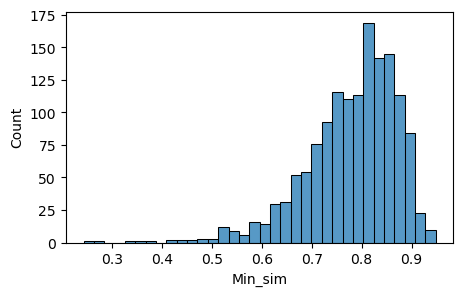

In [19]:
plt.figure(figsize=(5,3))
sns.histplot(data=similarity_data['Min_sim']);
plt.show()

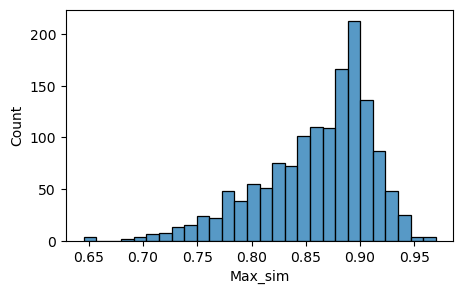

In [20]:
plt.figure(figsize=(5,3))
sns.histplot(data=similarity_data['Max_sim']);
plt.show()

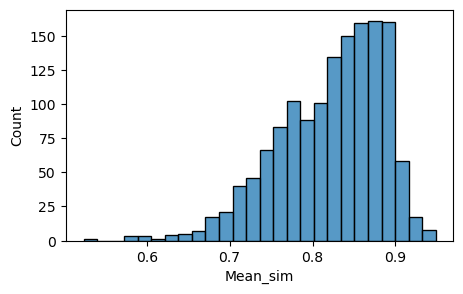

In [21]:
plt.figure(figsize=(5,3))
sns.histplot(data=similarity_data['Mean_sim']);
plt.show()

In [22]:
additional_set = pd.concat([data, similarity_data], axis=1)

In [23]:
additional_set

,Unnamed: 0,Task_Type,Question,Essay,Examiner_Commen,Task_Response,Coherence_Cohesion,Lexical_Resource,Range_Accuracy,Overall,...,A1,A2,B1,B2,C1,C2,AC,Min_sim,Max_sim,Mean_sim
0,0,1,The bar chart below describes some changes abo...,"Between 1995 and 2010, a study was conducted r...",NaN,NaN,NaN,NaN,NaN,5.5,...,180,262,9,141,4,16,11,0.888772,0.888772,0.888772
1,1,2,Rich countries often give money to poorer coun...,Poverty represents a worldwide crisis. It is t...,NaN,NaN,NaN,NaN,NaN,6.5,...,406,555,37,311,19,27,21,0.905571,0.905571,0.905571
2,2,1,The bar chart below describes some changes abo...,The left chart shows the population change hap...,NaN,NaN,NaN,NaN,NaN,5.0,...,249,324,7,167,9,26,8,0.805134,0.901597,0.857689
3,3,2,Rich countries often give money to poorer coun...,Human beings are facing many challenges nowada...,NaN,NaN,NaN,NaN,NaN,5.5,...,476,649,60,369,5,28,13,0.806889,0.895019,0.869743
4,4,1,The graph below shows the number of overseas v...,Information about the thousands of visits from...,NaN,NaN,NaN,NaN,NaN,7.0,...,234,320,19,174,2,15,6,0.752768,0.840785,0.796608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1430,2,Without capital punishment our lives are less ...,Serious crimes need capital punishment so that...,"You should rewrite it, giving more thought to ...",NaN,NaN,NaN,NaN,5.0,...,546,692,61,379,3,48,14,0.866343,0.866343,0.866343
1431,1431,2,Some people think that they can learn better b...,It is certainly said that learning is an ongoi...,Where are the paragraphs in this essay? You mu...,NaN,NaN,NaN,NaN,5.0,...,407,455,36,264,6,21,9,0.928800,0.928800,0.928800
1432,1432,2,Nowadays people like to change their day by da...,popular hobbies rather than their individual a...,I suggest that you read several essays that ha...,NaN,NaN,NaN,NaN,5.0,...,358,455,29,236,2,19,8,0.911031,0.911031,0.911031
1433,1433,2,Universities should allocate the same amount o...,"Yes, I do feel that universities should have a...","Your essay too short, the introduction is good...",NaN,NaN,NaN,NaN,5.0,...,287,358,37,194,9,8,9,0.843757,0.843757,0.843757


In [24]:
additional_set.to_csv('data/base_data_with_sim.csv', sep=';', index=False)

# Признаки сложности текста и легкости его восприятия читающим

In [25]:
 !pip install readability

In [36]:
import readability
import pandas as pd

In [37]:
data = pd.read_csv('data/base_data_with_sim.csv', sep=';')

In [38]:
from prepoc_func import multiple_split
from tqdm.notebook import tqdm

In [39]:
import spacy
import re

def tokenize_text(item):
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
    new_item = ''
    item = re.sub('[\n!?]', '\.', item)
    for sentence in item.split('.'):
        if len(sentence) > 1:
            sentence = sentence.strip()
            new_item = ''.join([new_item, ' '.join([token.text for token in nlp(sentence)]), ' .\n'])
    return new_item[:-1]

In [40]:
item = 124
results_bad = readability.getmeasures(tokenize_text(data.loc[item, 'Essay']), lang='en')
type(results_bad)

collections.OrderedDict

In [41]:
all_features = []
for high_level_index in list(results_bad.keys()):
    for low_level_index in list(results_bad[high_level_index].keys()):
        all_features.append('-'.join([high_level_index, low_level_index]))

In [42]:
all_features

['readability grades-Kincaid',
 'readability grades-ARI',
 'readability grades-Coleman-Liau',
 'readability grades-FleschReadingEase',
 'readability grades-GunningFogIndex',
 'readability grades-LIX',
 'readability grades-SMOGIndex',
 'readability grades-RIX',
 'readability grades-DaleChallIndex',
 'sentence info-characters_per_word',
 'sentence info-syll_per_word',
 'sentence info-words_per_sentence',
 'sentence info-sentences_per_paragraph',
 'sentence info-type_token_ratio',
 'sentence info-characters',
 'sentence info-syllables',
 'sentence info-words',
 'sentence info-wordtypes',
 'sentence info-sentences',
 'sentence info-paragraphs',
 'sentence info-long_words',
 'sentence info-complex_words',
 'sentence info-complex_words_dc',
 'word usage-tobeverb',
 'word usage-auxverb',
 'word usage-conjunction',
 'word usage-pronoun',
 'word usage-preposition',
 'word usage-nominalization',
 'sentence beginnings-pronoun',
 'sentence beginnings-interrogative',
 'sentence beginnings-article',

In [43]:
new_features = data.copy()
for feature in all_features:
    new_features[feature] = None
for item in tqdm(data.index):
    results = readability.getmeasures(tokenize_text(data.loc[item, 'Essay']), lang='en')
    for high_level_index in list(results.keys()):
        for low_level_index in list(results[high_level_index].keys()):
            new_features.loc[item, '-'.join([high_level_index, low_level_index])] =(
                                         results[high_level_index][low_level_index])

  0%|          | 0/1435 [00:00<?, ?it/s]

In [44]:
new_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             1435 non-null   int64  
 1   Task_Type                              1435 non-null   int64  
 2   Question                               1435 non-null   object 
 3   Essay                                  1435 non-null   object 
 4   Examiner_Commen                        62 non-null     object 
 5   Task_Response                          0 non-null      float64
 6   Coherence_Cohesion                     0 non-null      float64
 7   Lexical_Resource                       0 non-null      float64
 8   Range_Accuracy                         0 non-null      float64
 9   Overall                                1435 non-null   float64
 10  Unnamed: 9                             0 non-null      float64
 11  A1  

In [45]:
new_features.to_csv('data/base_data_full.csv', sep=';', index=False)